In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as prepoc
from sklearn.preprocessing import OneHotEncoder, StandardScaler
%matplotlib inline

### Loading data

In [2]:
data_dir = "../data/train.csv"
df = pd.read_csv(data_dir)

# Data Exploration

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Columns info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Numerical columns

In [5]:
num_columns = df.describe().columns[1:]
print(num_columns.array)

<NumpyExtensionArray>
[   'MSSubClass',   'LotFrontage',       'LotArea',   'OverallQual',
   'OverallCond',     'YearBuilt',  'YearRemodAdd',    'MasVnrArea',
    'BsmtFinSF1',    'BsmtFinSF2',     'BsmtUnfSF',   'TotalBsmtSF',
      '1stFlrSF',      '2ndFlrSF',  'LowQualFinSF',     'GrLivArea',
  'BsmtFullBath',  'BsmtHalfBath',      'FullBath',      'HalfBath',
  'BedroomAbvGr',  'KitchenAbvGr',  'TotRmsAbvGrd',    'Fireplaces',
   'GarageYrBlt',    'GarageCars',    'GarageArea',    'WoodDeckSF',
   'OpenPorchSF', 'EnclosedPorch',     '3SsnPorch',   'ScreenPorch',
      'PoolArea',       'MiscVal',        'MoSold',        'YrSold',
     'SalePrice']
Length: 37, dtype: object


In [6]:
df[num_columns].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


#### Count of numerical columns containing NaN (null) values

In [7]:
for key in df[num_columns]:
    nan_values_count = df[key].isna().sum()
    if nan_values_count != 0:
        print(f"{key}: {nan_values_count}")

LotFrontage: 259
MasVnrArea: 8
GarageYrBlt: 81


### Non-Numerical columns

In [8]:
cat_columns = df.columns.difference(num_columns)
print(cat_columns.array)

<NumpyExtensionArray>
[        'Alley',      'BldgType',      'BsmtCond',  'BsmtExposure',
  'BsmtFinType1',  'BsmtFinType2',      'BsmtQual',    'CentralAir',
    'Condition1',    'Condition2',    'Electrical',     'ExterCond',
     'ExterQual',   'Exterior1st',   'Exterior2nd',         'Fence',
   'FireplaceQu',    'Foundation',    'Functional',    'GarageCond',
  'GarageFinish',    'GarageQual',    'GarageType',       'Heating',
     'HeatingQC',    'HouseStyle',            'Id',   'KitchenQual',
   'LandContour',     'LandSlope',     'LotConfig',      'LotShape',
      'MSZoning',    'MasVnrType',   'MiscFeature',  'Neighborhood',
    'PavedDrive',        'PoolQC',      'RoofMatl',     'RoofStyle',
 'SaleCondition',      'SaleType',        'Street',     'Utilities']
Length: 44, dtype: object


In [9]:
df[cat_columns].head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,NaN,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
1,NaN,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,NaN,Veenker,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
2,NaN,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
3,NaN,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,NaN,Crawfor,Y,NaN,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,NaN,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,NoRidge,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub


#### Count of non-numerical columns containing NaN (null) values

In [10]:
for key in df[cat_columns]:
    nan_values_count = df[key].isna().sum()
    if nan_values_count != 0:
        print(f"{key}: {nan_values_count}")

Alley: 1369
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinType2: 38
BsmtQual: 37
Electrical: 1
Fence: 1179
FireplaceQu: 690
GarageCond: 81
GarageFinish: 81
GarageQual: 81
GarageType: 81
MasVnrType: 872
MiscFeature: 1406
PoolQC: 1453


### The detailed exploration of each feature is located in the following eda notebooks accordingly:
1. house_general_eda.ipynb: BldgType, MSSubClass, HouseStyle, Functional, OverallQual, OverallCond, YearBuilt, YearRemodAdd, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, MiscFeature

2. house_exterior_eda.ipynb: RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch

3. house_site_eda.ipynb: LotFrontage, LotArea, LotShape, LotConfig, Street, Alley, LandContour, LandSlope, Neighborhood, Fence, Condition1, Condition2, PavedDrive, PoolArea, PoolQC

4. house_systems_and_utilities_eda.ipynb: Utilities, Heating, HeatingQC, CentralAir, Electrical, Fireplaces, FireplaceQu

5. house_rooms_eda.ipynb: BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd

6. garage_eda.ipynb: GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond

7. basement_eda.ipynb: BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF

8. sale_eda.ipynb: MiscVal, MoSold, YrSold, SaleType, SaleCondition, MSZoning

# Data Transformation

## Transformation of a target feature

array([[<Axes: title={'center': 'SalePrice'}>]], dtype=object)

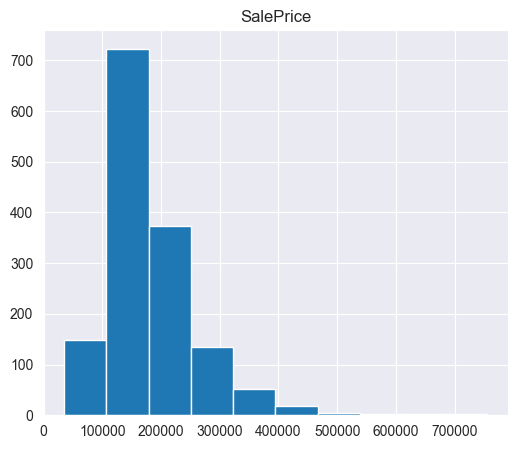

In [11]:
df[["SalePrice"]].hist(bins=10, figsize=(6, 5))

In [12]:
### Log-scaling a sale price ###
df[["SalePrice"]] = np.log10(df[["SalePrice"]] + 1)

array([[<Axes: title={'center': 'SalePrice'}>]], dtype=object)

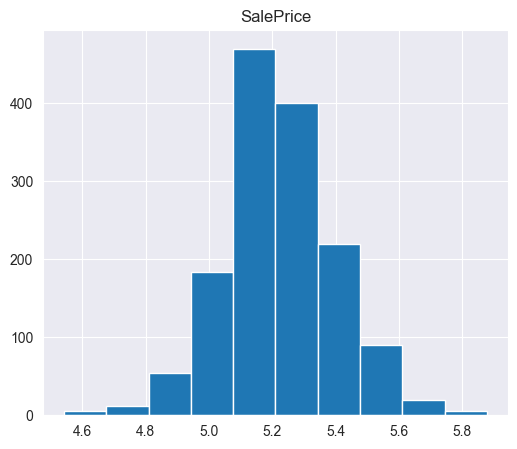

In [13]:
df[["SalePrice"]].hist(bins=10, figsize=(6, 5))

## Transformation of general house features (house_general_eda)

### Transformation of numerical features

In [14]:
columns_to_log = ["1stFlrSF", "GrLivArea"]
columns_to_std = ["YearBuilt", "YearRemodAdd", "LowQualFinSF", "2ndFlrSF", "1stFlrSF", "GrLivArea"]

### Log scaling ###
df[columns_to_log] = np.log10(df[columns_to_log] + 1)

### Standard scaling ###
scaler = StandardScaler()
scaler.fit(df[columns_to_std])
df[columns_to_std] = scaler.transform(df[columns_to_std])

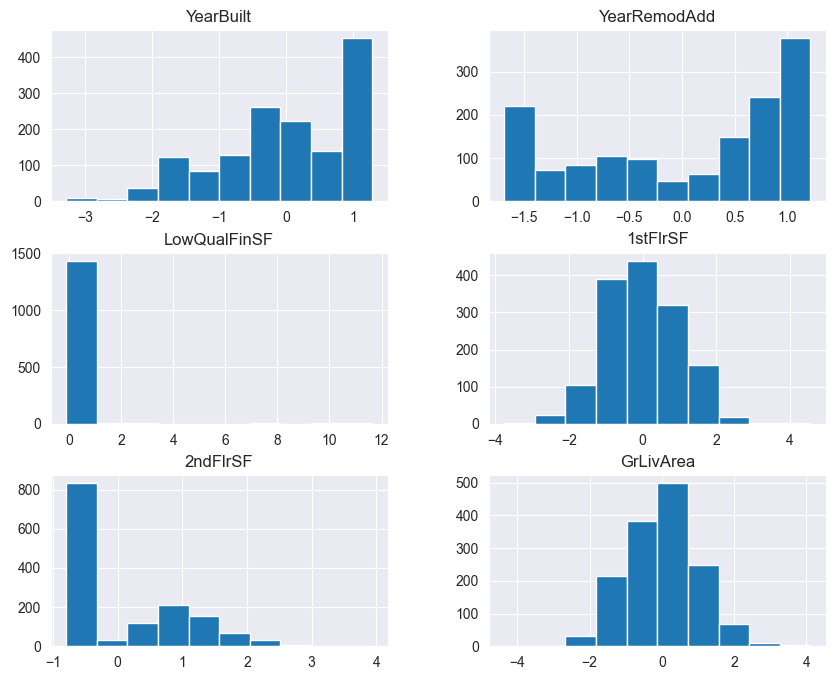

In [15]:
df[["YearBuilt", "YearRemodAdd", "LowQualFinSF", "1stFlrSF", "2ndFlrSF", "GrLivArea"]].hist(bins=10, figsize=(10, 8))
plt.show()

In [16]:
df[["YearBuilt", "YearRemodAdd", "LowQualFinSF", "1stFlrSF", "2ndFlrSF", "GrLivArea"]].describe()

,YearBuilt,YearRemodAdd,LowQualFinSF,1stFlrSF,2ndFlrSF,GrLivArea
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,1.046347e-15,4.496860e-15,1.216683e-17,2.194287e-15,-1.825024e-17,8.595864e-16
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-3.287824e+00,-1.689368e+00,-1.202417e-01,-3.763749e+00,-7.951632e-01,-4.365036e+00
25%,-5.719226e-01,-8.656586e-01,-1.202417e-01,-7.094592e-01,-7.951632e-01,-7.146000e-01
50%,5.737148e-02,4.425864e-01,-1.202417e-01,-5.154533e-02,-7.951632e-01,6.332373e-02
75%,9.516316e-01,9.271216e-01,-1.202417e-01,7.255204e-01,8.731117e-01,6.440545e-01
max,1.282839e+00,1.217843e+00,1.164775e+01,4.554909e+00,3.936963e+00,4.110760e+00


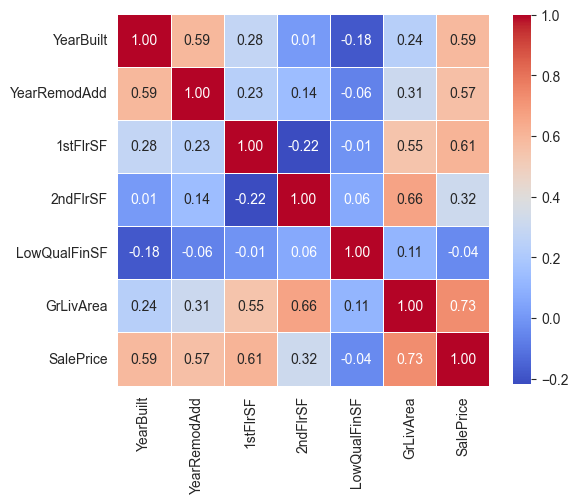

In [17]:
df_num = df[["YearBuilt", "YearRemodAdd", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "SalePrice"]]
corr_matrix = df_num.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": .8}, square=True)
plt.show()

### Transformation of categorical features

#### MSSubClass